SVD разложение

In [ ]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

img = Image.open('/content/images.jpeg')
w, h = img.size
img = img.resize((w//4, h//4)) # можно не делать .resize(())

X = np.array(img, dtype=np.float32) # преобразование из PIL в numpy array
U, S, V = np.linalg.svd(X, full_matrices=False) # разложение SVD
# # обратное преобразование из numpy array в PIL с сохранение изображения на диск


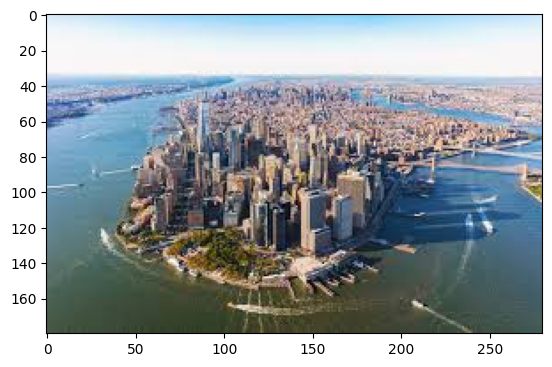

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open('/content/images.jpeg')
plt.imshow(img)
plt.show()


In [ ]:
S

array([[3132.953    ,  159.25726  ,   11.615125 ],
       [3276.8618   ,  120.314766 ,   11.059337 ],
       [3390.3054   ,   77.588524 ,   11.9938545],
       [3486.2805   ,   55.88203  ,    9.13768  ],
       [3545.298    ,   37.960052 ,    7.3036056],
       [3577.2778   ,   15.891443 ,    6.250808 ],
       [3582.6863   ,   11.143644 ,    7.792135 ],
       [3584.8115   ,   12.826863 ,    9.407574 ],
       [3348.0005   ,   40.69284  ,   14.75071  ],
       [2774.0234   ,  160.69441  ,   16.419424 ],
       [2600.7175   ,  170.57387  ,   25.382605 ],
       [2420.565    ,  184.4598   ,   35.698296 ],
       [2401.3848   ,  223.1595   ,   43.69772  ],
       [2379.5415   ,  229.01689  ,   43.92055  ],
       [2315.149    ,  265.34125  ,   39.58992  ],
       [2320.1853   ,  259.4559   ,   30.954426 ],
       [2243.566    ,  271.86224  ,   30.910507 ],
       [2155.3127   ,  275.8239   ,   30.621313 ],
       [2044.0468   ,  268.21     ,   38.371197 ],
       [1920.2522   ,  213.9102

In [ ]:
X = np.array(img, dtype=np.float32)  # (h, w, 3)
img_channels = []
for c in range(3):
    X_channel = X[:, :, c]
    U, s, V = np.linalg.svd(X_channel, full_matrices=False)
    recon = U @ np.diag(s) @ V
    img_channels.append(recon)
img_reconstructed = np.stack(img_channels, axis=-1)


In [ ]:
img_reconstructed

array([[[218.99997 , 236.00003 , 249.99998 ],
        [217.99997 , 234.99994 , 248.00002 ],
        [216.99997 , 232.99997 , 246.99995 ],
        ...,
        [201.99997 , 230.00003 , 253.00003 ],
        [204.00002 , 231.99997 , 251.      ],
        [206.00002 , 233.00002 , 252.00003 ]],

       [[231.      , 243.00003 , 252.99997 ],
        [230.00002 , 242.00002 , 251.99995 ],
        [229.      , 242.00003 , 251.00003 ],
        ...,
        [216.00006 , 238.99997 , 251.      ],
        [218.00005 , 239.00003 , 247.99997 ],
        [218.99997 , 239.99997 , 249.00002 ]],

       [[240.99997 , 246.00006 , 251.      ],
        [241.      , 246.      , 250.99994 ],
        [240.00002 , 245.00003 , 249.99994 ],
        ...,
        [230.99998 , 244.00003 , 248.99997 ],
        [231.99998 , 244.      , 248.00003 ],
        [232.00005 , 244.      , 247.99998 ]],

       ...,

       [[ 73.00002 ,  92.      ,  74.      ],
        [ 70.999985,  89.99999 ,  72.00001 ],
        [ 69.00001 ,  

In [ ]:
U.shape

(45, 70, 3)

In [ ]:
S.shape

(45, 3)

In [ ]:
V.shape

(45, 3, 3)

In [ ]:
Y_r

array([[[218.99997 , 236.00003 , 249.99998 ],
        [217.99997 , 234.99994 , 248.00002 ],
        [216.99997 , 232.99997 , 246.99995 ],
        ...,
        [201.99997 , 230.00003 , 253.00003 ],
        [204.00002 , 231.99997 , 251.      ],
        [206.00002 , 233.00002 , 252.00003 ]],

       [[231.      , 243.00003 , 252.99997 ],
        [230.00002 , 242.00002 , 251.99995 ],
        [229.      , 242.00003 , 251.00003 ],
        ...,
        [216.00006 , 238.99997 , 251.      ],
        [218.00005 , 239.00003 , 247.99997 ],
        [218.99997 , 239.99997 , 249.00002 ]],

       [[240.99997 , 246.00006 , 251.      ],
        [241.      , 246.      , 250.99994 ],
        [240.00002 , 245.00003 , 249.99994 ],
        ...,
        [230.99998 , 244.00003 , 248.99997 ],
        [231.99998 , 244.      , 248.00003 ],
        [232.00005 , 244.      , 247.99998 ]],

       ...,

       [[ 73.00002 ,  92.      ,  74.      ],
        [ 70.999985,  89.99999 ,  72.00001 ],
        [ 69.00001 ,  

In [ ]:
Y_r = img_reconstructed
Image.fromarray(np.asarray(img_reconstructed, dtype=np.uint8)).save('photo.png')

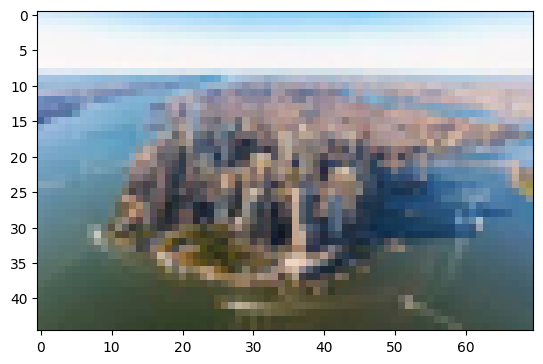

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open('/content/photo.png')
plt.imshow(img)
plt.show()


LDA и NB

Ковариационная матрица:
[[ 0.11963045 -0.11202478]
 [-0.11202478  0.12350951]]


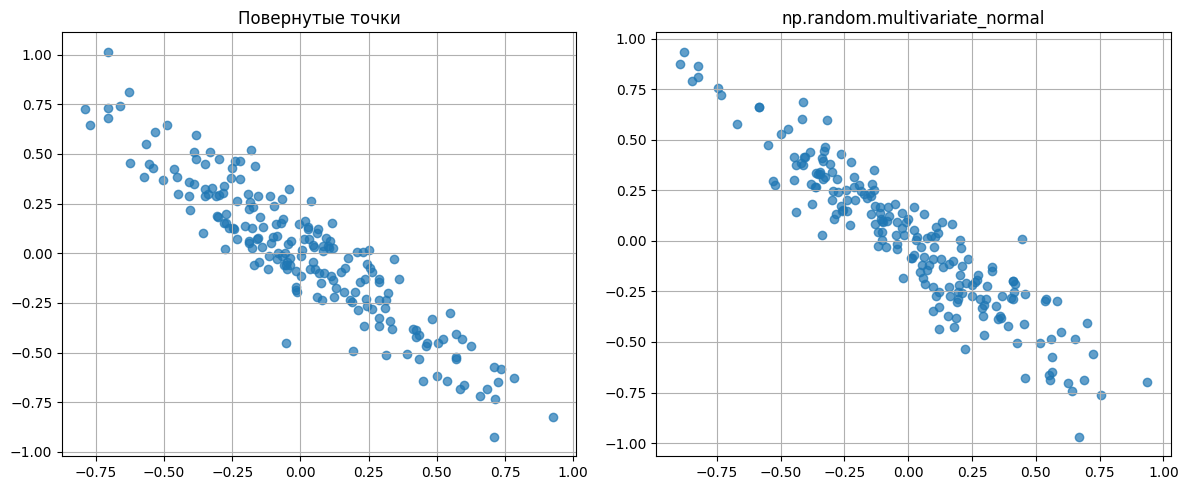

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn.base import BaseEstimator
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Задание 1. Многомерное гауссово распределение

M = 200
sigma1 = 0.1
sigma2 = 0.5
x1 = np.random.randn(M, 1) * sigma1
x2 = np.random.randn(M, 1) * sigma2
X = np.concatenate((x1, x2), axis=1)

alpha = np.pi/4
rotation_matrix = np.array([[np.cos(alpha), -np.sin(alpha)],
                           [np.sin(alpha), np.cos(alpha)]])
X_rotated = X @ rotation_matrix.T

cov_matrix = np.cov(X_rotated.T)
print("Ковариационная матрица:")
print(cov_matrix)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_rotated[:, 0], X_rotated[:, 1], alpha=0.7)
plt.title('Повернутые точки')
plt.grid(True)

mu = np.mean(X_rotated, axis=0)
X_multivariate = np.random.multivariate_normal(mu, cov_matrix, M)

plt.subplot(1, 2, 2)
plt.scatter(X_multivariate[:, 0], X_multivariate[:, 1], alpha=0.7)
plt.title('np.random.multivariate_normal')
plt.grid(True)

plt.tight_layout()
plt.show()

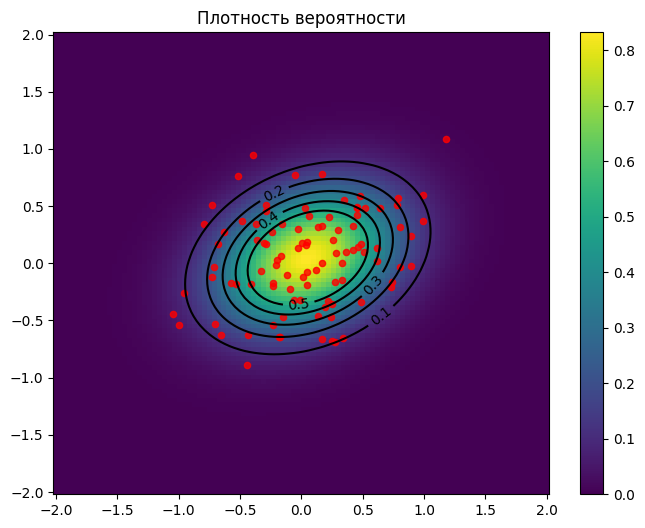

In [2]:
# Задание 2. Плотность вероятности гауссового распределения

np.random.seed(42)
mean = [0, 0]
cov = [[0.3, 0.1], [0.1, 0.2]]
data_points = np.random.multivariate_normal(mean, cov, 100)

sample_mean = np.mean(data_points, axis=0)
sample_cov = np.cov(data_points.T)

xx = np.linspace(-2, 2, 100)
yy = np.linspace(-2, 2, 100)
XX, YY = np.meshgrid(xx, yy)
pp = np.stack((XX.flatten(), YY.flatten()), axis=1)

m = multivariate_normal(mean=sample_mean, cov=sample_cov)
ZZ = m.pdf(pp).reshape(XX.shape)

plt.figure(figsize=(8, 6))
IMG = plt.pcolor(XX, YY, ZZ)
plt.colorbar(IMG)
plt.scatter(data_points[:, 0], data_points[:, 1], c='red', s=20, alpha=0.8)
CS = plt.contour(XX, YY, ZZ, levels=[0.1, 0.2, 0.3, 0.4, 0.5], colors='k')
plt.clabel(CS, inline=1, fontsize=10)
plt.title('Плотность вероятности')
plt.show()

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


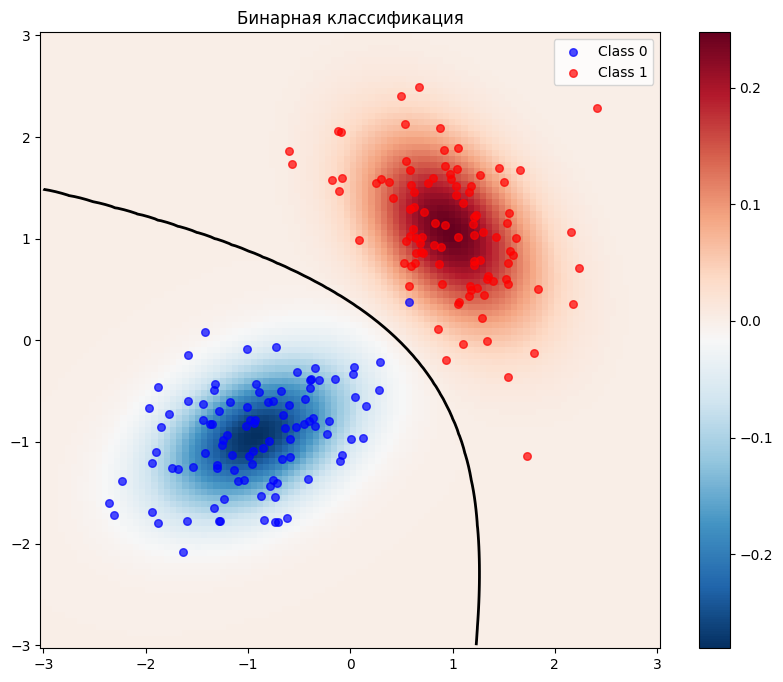

In [3]:
# Задание 3. Бинарная классификация

np.random.seed(42)
n_samples = 200

class_0_mean = [-1, -1]
class_1_mean = [1, 1]
class_0_cov = [[0.5, 0.2], [0.2, 0.3]]
class_1_cov = [[0.3, -0.1], [-0.1, 0.4]]

class_0_data = np.random.multivariate_normal(class_0_mean, class_0_cov, n_samples//2)
class_1_data = np.random.multivariate_normal(class_1_mean, class_1_cov, n_samples//2)

X_data = np.vstack([class_0_data, class_1_data])
y_data = np.hstack([np.zeros(n_samples//2), np.ones(n_samples//2)])

mu_0 = np.mean(class_0_data, axis=0)
mu_1 = np.mean(class_1_data, axis=0)
C_0 = np.cov(class_0_data.T)
C_1 = np.cov(class_1_data.T)

p_y_0 = np.sum(y_data == 0) / len(y_data)
p_y_1 = np.sum(y_data == 1) / len(y_data)

xx = np.linspace(-3, 3, 100)
yy = np.linspace(-3, 3, 100)
XX, YY = np.meshgrid(xx, yy)
pp = np.stack((XX.flatten(), YY.flatten()), axis=1)

m_0 = multivariate_normal(mean=mu_0, cov=C_0)
m_1 = multivariate_normal(mean=mu_1, cov=C_1)

likelihood_0 = m_0.pdf(pp) * p_y_0
likelihood_1 = m_1.pdf(pp) * p_y_1

difference = likelihood_1 - likelihood_0
ZZ_diff = difference.reshape(XX.shape)

plt.figure(figsize=(10, 8))
IMG = plt.pcolor(XX, YY, ZZ_diff, cmap='RdBu_r')
plt.colorbar(IMG)
plt.scatter(class_0_data[:, 0], class_0_data[:, 1], c='blue', s=30, alpha=0.7, label='Class 0')
plt.scatter(class_1_data[:, 0], class_1_data[:, 1], c='red', s=30, alpha=0.7, label='Class 1')
plt.contour(XX, YY, ZZ_diff, levels=[0], colors='black', linewidths=2)
plt.legend()
plt.title('Бинарная классификация')
plt.show()


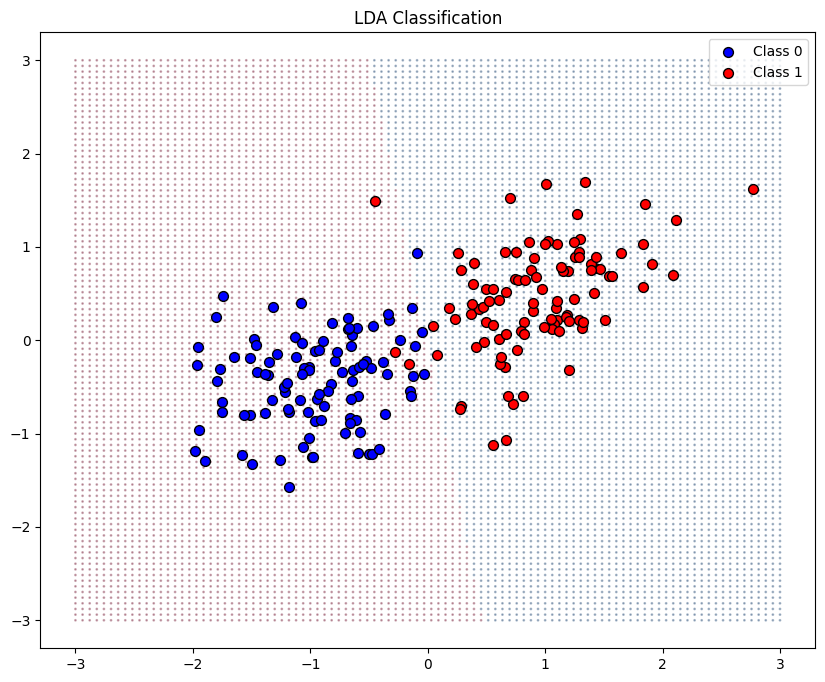

In [4]:
# Задание 4. LDA (Linear Discriminant Analysis)

class myLDA(BaseEstimator):
    def __init__(self):
        pass

    def fit(self, X, y):
        self.classes = np.unique(y)
        self.means = {}
        self.priors = {}

        for c in self.classes:
            X_c = X[y == c]
            self.means[c] = np.mean(X_c, axis=0)
            self.priors[c] = len(X_c) / len(X)

        pooled_cov = np.zeros((X.shape[1], X.shape[1]))
        for c in self.classes:
            X_c = X[y == c]
            cov_c = np.cov(X_c.T, bias=False)
            pooled_cov += (len(X_c) - 1) * cov_c

        self.shared_cov = pooled_cov / (len(X) - len(self.classes))
        self.shared_cov_inv = np.linalg.pinv(self.shared_cov)

        return self

    def predict(self, X):
        predictions = []
        for x in X:
            scores = {}
            for c in self.classes:
                diff = x - self.means[c]
                score = -0.5 * np.dot(diff, np.dot(self.shared_cov_inv, diff)) + np.log(self.priors[c])
                scores[c] = score
            predictions.append(max(scores, key=scores.get))
        return np.array(predictions)

np.random.seed(42)
class_0_data_lda = np.random.multivariate_normal([-1, -0.5], [[0.3, 0.1], [0.1, 0.3]], 100)
class_1_data_lda = np.random.multivariate_normal([1, 0.5], [[0.3, 0.1], [0.1, 0.3]], 100)

X_lda = np.vstack([class_0_data_lda, class_1_data_lda])
y_lda = np.hstack([np.zeros(100), np.ones(100)])

lda = myLDA()
lda.fit(X_lda, y_lda)

xx = np.linspace(-3, 3, 100)
yy = np.linspace(-3, 3, 100)
XX, YY = np.meshgrid(xx, yy)
grid_points = np.column_stack([XX.ravel(), YY.ravel()])
grid_predictions = lda.predict(grid_points)

plt.figure(figsize=(10, 8))
plt.scatter(XX.ravel(), YY.ravel(), c=grid_predictions, alpha=0.3, s=1, cmap='RdBu')
plt.scatter(class_0_data_lda[:, 0], class_0_data_lda[:, 1], c='blue', s=50, edgecolor='black', label='Class 0')
plt.scatter(class_1_data_lda[:, 0], class_1_data_lda[:, 1], c='red', s=50, edgecolor='black', label='Class 1')
plt.legend()
plt.title('LDA Classification')
plt.show()


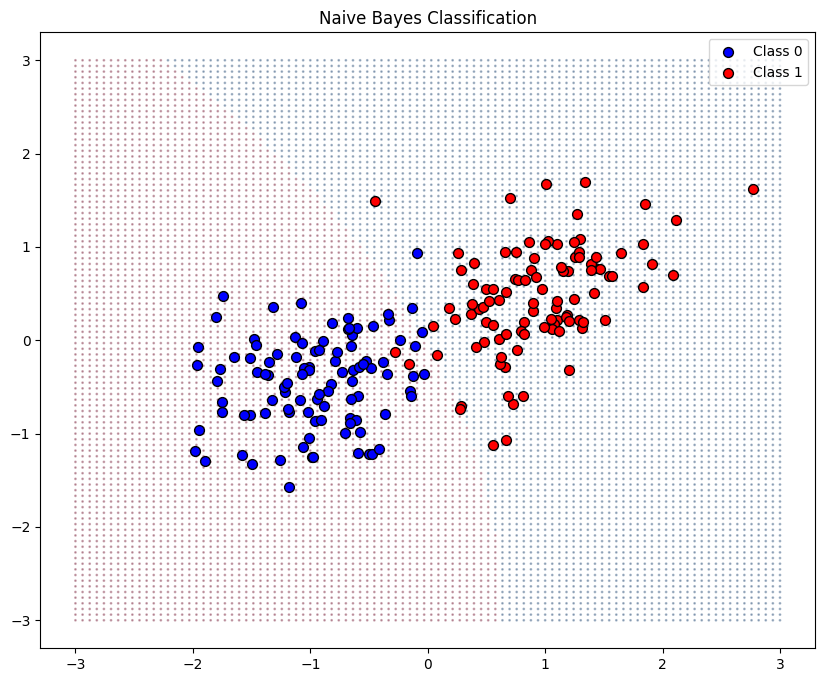

In [5]:

# Задание 5. Наивный байесовский классификатор (Naive Bayes)

class myNB(BaseEstimator):
    def __init__(self):
        pass

    def fit(self, X, y):
        self.classes = np.unique(y)
        self.means = {}
        self.stds = {}
        self.priors = {}

        for c in self.classes:
            X_c = X[y == c]
            self.means[c] = np.mean(X_c, axis=0)
            self.stds[c] = np.std(X_c, axis=0, ddof=1)
            self.priors[c] = len(X_c) / len(X)

        return self

    def _gaussian_prob(self, x, mean, std):
        return (1 / (np.sqrt(2 * np.pi) * std)) * np.exp(-0.5 * ((x - mean) / std) ** 2)

    def predict(self, X):
        predictions = []
        for x in X:
            scores = {}
            for c in self.classes:
                likelihood = np.prod(self._gaussian_prob(x, self.means[c], self.stds[c]))
                posterior = likelihood * self.priors[c]
                scores[c] = posterior
            predictions.append(max(scores, key=scores.get))
        return np.array(predictions)

nb = myNB()
nb.fit(X_lda, y_lda)

grid_predictions_nb = nb.predict(grid_points)

plt.figure(figsize=(10, 8))
plt.scatter(XX.ravel(), YY.ravel(), c=grid_predictions_nb, alpha=0.3, s=1, cmap='RdBu')
plt.scatter(class_0_data_lda[:, 0], class_0_data_lda[:, 1], c='blue', s=50, edgecolor='black', label='Class 0')
plt.scatter(class_1_data_lda[:, 0], class_1_data_lda[:, 1], c='red', s=50, edgecolor='black', label='Class 1')
plt.legend()
plt.title('Naive Bayes Classification')
plt.show()

Результаты классификации:
LDA - Accuracy: 0.887, Precision: 0.941, Recall: 0.830
Naive Bayes - Accuracy: 0.883, Precision: 0.928, Recall: 0.837


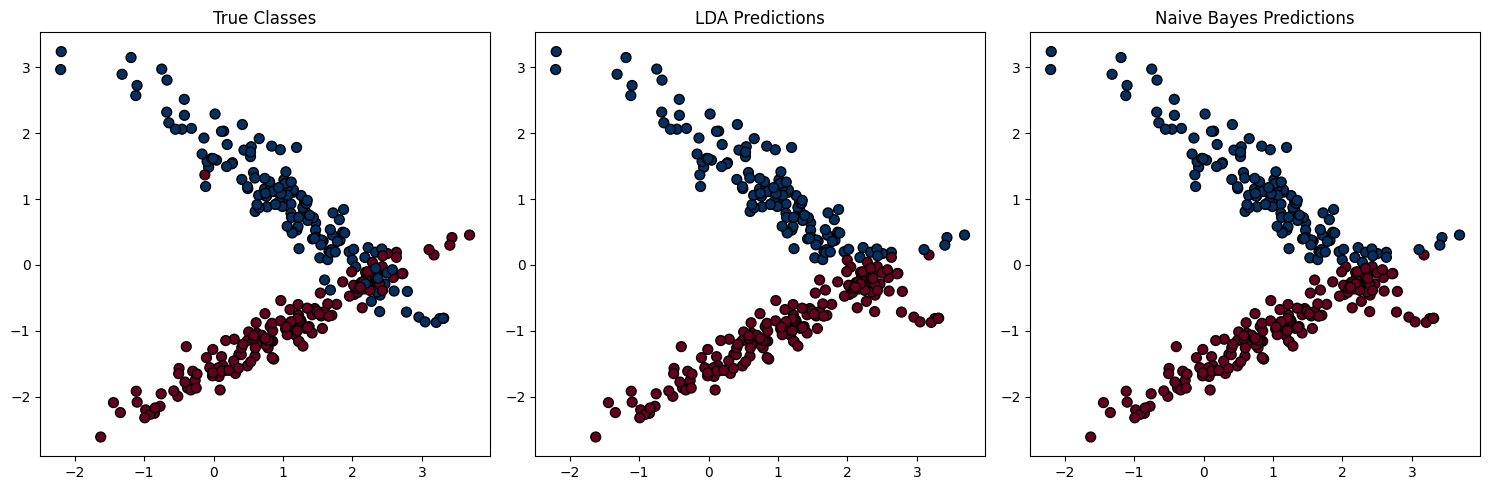

In [6]:
# Задание 6. Сравнение LDA и Naive Bayes

X_comparison, y_comparison = make_classification(n_samples=1000, n_features=2, n_redundant=0,
                                               n_informative=2, n_clusters_per_class=1,
                                               random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X_comparison, y_comparison,
                                                    test_size=0.3, random_state=42)

lda_classifier = myLDA()
lda_classifier.fit(X_train, y_train)
lda_predictions = lda_classifier.predict(X_test)

nb_classifier = myNB()
nb_classifier.fit(X_train, y_train)
nb_predictions = nb_classifier.predict(X_test)

lda_accuracy = accuracy_score(y_test, lda_predictions)
lda_precision = precision_score(y_test, lda_predictions)
lda_recall = recall_score(y_test, lda_predictions)

nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_precision = precision_score(y_test, nb_predictions)
nb_recall = recall_score(y_test, nb_predictions)

print("Результаты классификации:")
print(f"LDA - Accuracy: {lda_accuracy:.3f}, Precision: {lda_precision:.3f}, Recall: {lda_recall:.3f}")
print(f"Naive Bayes - Accuracy: {nb_accuracy:.3f}, Precision: {nb_precision:.3f}, Recall: {nb_recall:.3f}")

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='RdBu', s=50, edgecolor='black')
plt.title('True Classes')

plt.subplot(1, 3, 2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=lda_predictions, cmap='RdBu', s=50, edgecolor='black')
plt.title('LDA Predictions')

plt.subplot(1, 3, 3)
plt.scatter(X_test[:, 0], X_test[:, 1], c=nb_predictions, cmap='RdBu', s=50, edgecolor='black')
plt.title('Naive Bayes Predictions')

plt.tight_layout()
plt.show()